In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [60]:
train_df = pd.read_csv('./data/train_iris.csv', index_col=0)
test_df = pd.read_csv('./data/test_iris.csv', index_col=0)

In [61]:
X_train = train_df.drop('species', axis=1)
X_test = test_df.drop('species', axis=1)

y_train = train_df.species
y_test = test_df.species

In [62]:
score_data = pd.DataFrame()
rs = np.random.seed(0)

In [63]:
max_range_value = range(1, 100)

In [64]:
for max_depth in max_range_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth,
                                      random_state=rs)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_train, y_train)
    train_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'test_score': [test_score],
        'train_score': [train_score]
    })
    score_data = score_data.append(temp_score_data)


In [65]:
score_data.head()

,max_depth,test_score,train_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [66]:
score_data_long = pd.melt(score_data, id_vars=['max_depth'],
                     value_vars=['train_score', 'test_score'],
                     var_name='set_type',
                     value_name='score')
score_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.60
1,2,train_score,0.94
2,3,train_score,0.94
3,4,train_score,0.92
4,5,train_score,0.92


<AxesSubplot:xlabel='max_depth', ylabel='score'>

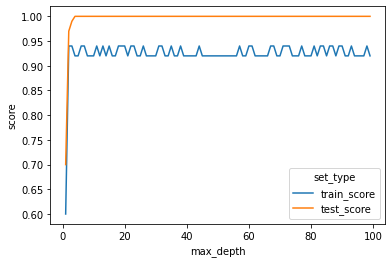

In [70]:
sns.lineplot(data=score_data_long, x="max_depth", y="score", hue="set_type")